<a href="https://colab.research.google.com/github/ANAGHA-SREYAS/machine_learning_practice/blob/main/ML_classification_winequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Prediction_Machine Learning

Here we will predict the quality of wine on the basis of given features. We use the wine quality dataset available on Internet for free. This dataset has the fundamental features which are responsible for affecting the quality of the wine. By the use of several Machine learning models, we will predict the quality of the wine.

**Importing libraries and data set**

importing libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

read the sata set

In [10]:
data=pd.read_csv('/winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Understanding the data set

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [12]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [13]:
#check the number of null values in the dataset columns wise.
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

data contains null values. the null values can be filled by mean value of the columns

In [14]:
for col in data.columns:
  if data[col].isnull().sum()>0:
    data[col]=data[col].fillna(data[col].mean())
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# **EDA**

 histogram to visualise the distribution of the data with continuous values in the columns of the dataset.

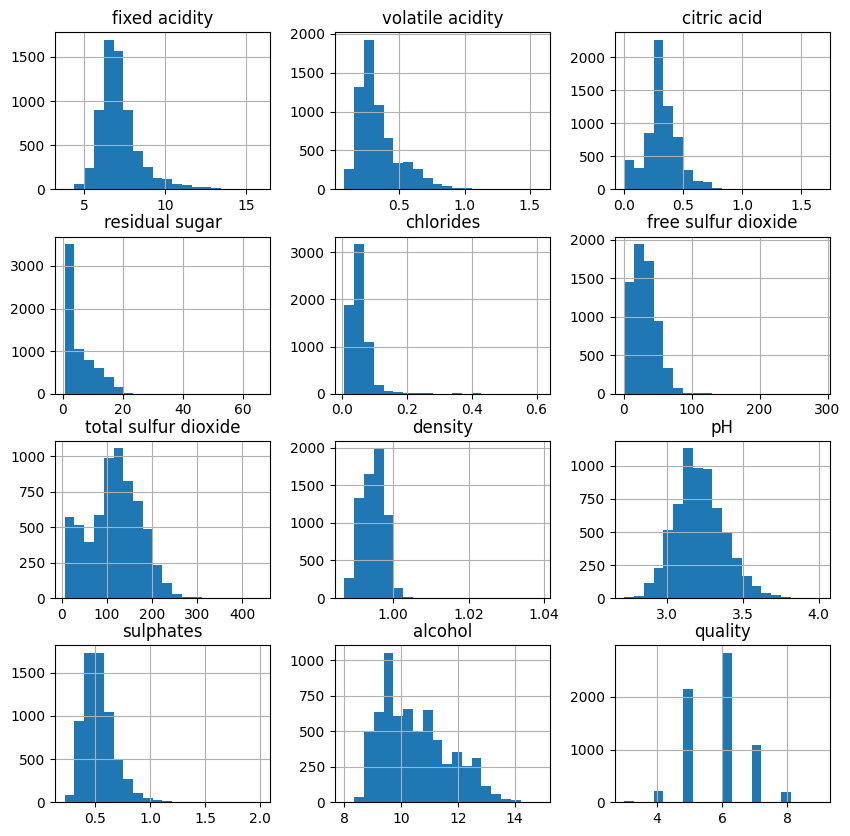

In [15]:
data.hist(bins=20, figsize=(10, 10))
plt.show()

There are times the data provided to us contains redundant features they do not help with increasing the model’s performance that is why we remove them before using them to train our model.

In [16]:
#df = data.drop(columns=['type'])

In [17]:
data.replace({'white': 1, 'red': 0}, inplace=True)

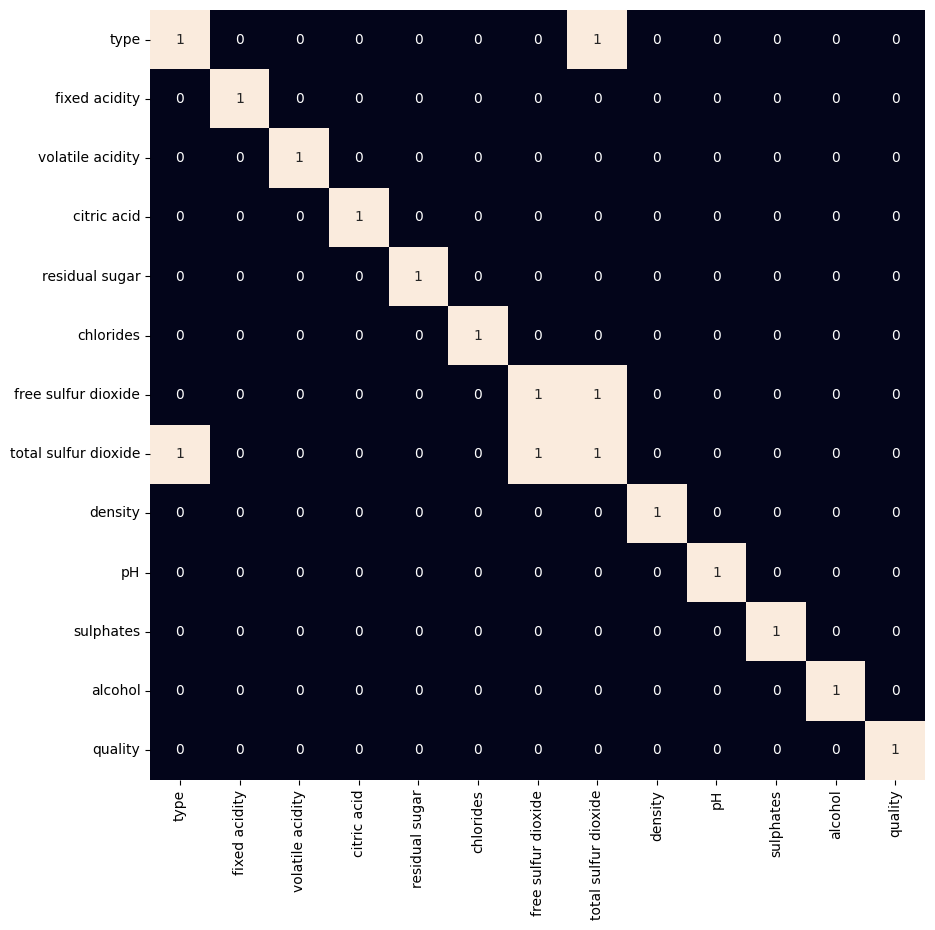

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr()>0.7,annot=True,cbar=False)
plt.show()


From the above heat map we can conclude that the ‘total sulphur dioxide’ and ‘free sulphur dioxide‘ are highly correlated features so, we will remove them

In [19]:
df=data.drop(columns=['total sulfur dioxide'],axis=1)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6


# model building and evaluation

Let’s prepare our data for training and splitting it into training and validation data so, that we can select which model’s performance is best as per the use case. We will train some of the state of the art machine learning classification models and then select best out of them using validation data

In [20]:
df['best quality']=[1 if x>5 else 0 for x in df['quality']]
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,1,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


# Assigning values to X and Y

In [21]:
from re import X
x=df.drop(['quality','best quality'],axis=1)
y=df['best quality']

In [22]:
x.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9
4,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9


In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: best quality, dtype: int64

# train test split

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

Normalising the data before training help us to achieve stable and fast training of the model.

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# Model building and Evaluation

logistic regressiion

In [26]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [27]:
#prediction
y_pred=model.predict(x_test)

In [28]:
#evaluation
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.70      0.54      0.61       735
           1       0.76      0.86      0.80      1215

    accuracy                           0.74      1950
   macro avg       0.73      0.70      0.71      1950
weighted avg       0.73      0.74      0.73      1950



In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,average_precision_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 397,  338],
       [ 173, 1042]])

In [30]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.737948717948718

Decision tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
#prediction
y_pred=model.predict(x_test)

In [33]:
#evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,average_precision_score

In [35]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[494, 241],
       [266, 949]])

In [37]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.74

Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier()

In [39]:
#prediction
y_pred=model.predict(x_test)

In [41]:
#evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 506,  229],
       [ 133, 1082]])

In [42]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8143589743589743

KNN Algorithm

In [43]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [44]:
#prediction
y_pred=model.predict(x_test)

In [46]:
#evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 440,  295],
       [ 202, 1013]])

In [47]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7451282051282051

The random forest model gives more accurate predictions with accuracy score of 81%

In [53]:
#unknown prediction
unknown_data=[[1,7.8,.31,5.5,20.5,.060,45,1,3.3,.45,8.9]]
unknown_predict=model.predict(unknown_data)
unknown_predict

array([0])